In [8]:
# Datasets & DataLoaders

# Datasets and DataLoaders are an attempt to streamline the model processing from the actual model training code
# i.e. you can think of these as the PyTorch specific data structures required for input
# you still need to clean the data somewhere else first (I think)

# These are 
# torch.utils.data.DataLoader
# torch.utils.data.Dataset

# Dataset is used for actually storing the samples
# DataLoader is an iterable that wraps around Dataset that facilitates access

# Datsets supports
# text, image, and audio datasets

# Below we go through an example of a Fashion-MNIST dataset from TorchVision
# Each sample contains a 28 x 28 grayscale image that corresponds to one of 10 labels

In [1]:
# Preliminary
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torchvision.transforms import RandomCrop
import matplotlib.pyplot as plt

In [2]:
# set up training data
training_data = datasets.FashionMNIST(
    # essentially a path variable, where to download the data to
    # these are in the form of ubyte files
    root = "data", 
    # pre-determined train/test split
    train = True,
    # download if not already downloaded
    download = True, 
    # optional function that takes in a PIL image, and transforms it
    # NOT the actual data format, e.g. more for transforms.RandomCrop
    transform = ToTensor()
)
training_data2 = datasets.FashionMNIST(
    root = "data", 
    train = True,
    download = True,
    # this should be cropped to a smaller size
    transform = transforms.Compose([
        RandomCrop(size = (20, 20)), 
        ToTensor()]
    )
)

# training_data2 = datasets.FashionMNIST(
#     root = "data", 
#     train = True,
#     download = True,
#     # this should be cropped to the same size
#     transform = [
#         RandomCrop(size = (28, 28)), 
#         ToTensor()]
# )

test_data = datasets.FashionMNIST(
    root = "data", 
    train = False, 
    download = True, 
    transform = ToTensor()
)

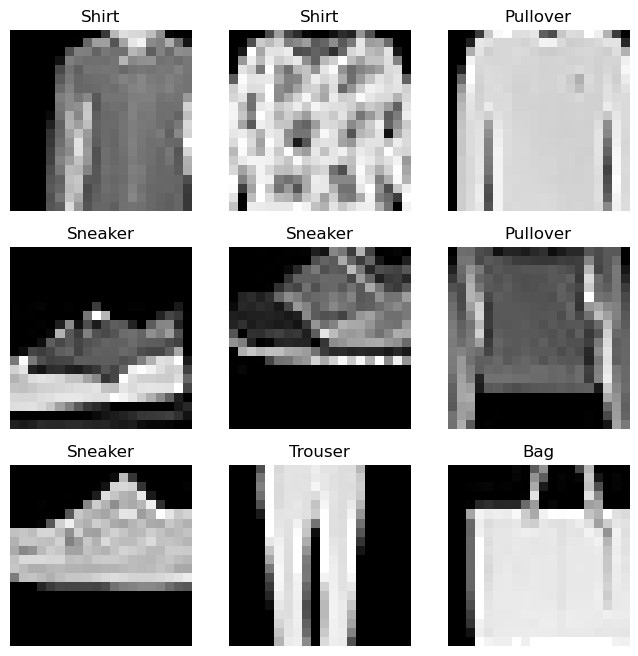

In [3]:
# Visualize the Datset
# curly braces are dictionaries
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# plot some figures
figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    # randint returns a tensor filled with random integers
    # size determines the shape of the output tensor
    # (1, ) defines a 1d tensor (i.e. vector)
    # .item() coerces it back to a number
    sample_idx = torch.randint(low = 0, high = len(training_data2), size = (1, 1)).item()
    img, label = training_data2[sample_idx]
    figure.add_subplot(rows, cols, i)
    # set up plot options
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()


In [4]:
torch.randint(low = 0, high = len(training_data), size = (2,))
training_data2

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(20, 20), padding=None)
               ToTensor()
           )

In [ ]:
# Implementing a Custom Dataset
# A custom Dataset class must implement three methods: __init__, __len__, and __getitem__

# As with all Python classes, 

import os
import pandas as pd
from torchvision.io import read_image

# define a class called CustomImageDataset
# this inherits from the Dataset class

class CustomImageDataset(Dataset):
    # constructor method
    # inputs:
    # annotations_file = path to CSV containing the labels
    # transform = optional transform to be applied to the image
    # target_transform = optional transform to be applied to the target label
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    # save all the various attributes to the object itself
        self.img_labels = pd.read_sv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    # length method
    def __len__(self):
        return len(self.img_labels)
    # getitem method
    # inputs
    # idx = index of the sample to be retrieved
    # don't forget zero based indexing!
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            # return as tuple
        return image, label

In [6]:
# testing this out
# The __init__ method is run once when creating the object
# We initialize using the
# directory containing the images
# annotations file
# and the transform functions (details relegated further below)


Feature batch shape: torch.Size([64, 1, 28, 28])



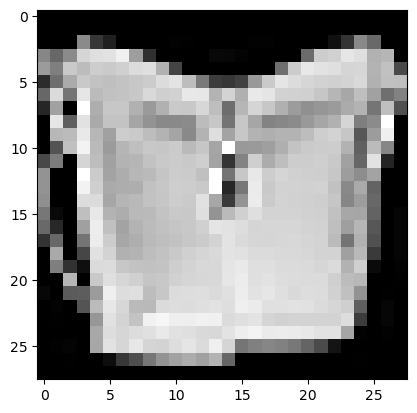

Numerical Label: 8
Label: Bag


In [17]:
# Iterate through DataLoader
# Dataset only retrieves the dataset's features and labels one sample at a time
# This is really inefficient, so we use DataLoader, a wrapper which allows us to
# automatically iterate through

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

# Iterate through the DataLoader

# Display Image and Label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
# Numerical Label
print(f"Numerical Label: {label}")
# Label, note that label is a tensor and needs to be coerced to a number
print(f"Label: {labels_map[label.item()]}")